In [1]:
# Cek sistem & GPU + suppress warnings/logging
import os, platform, sys, subprocess, warnings, logging
warnings.filterwarnings("ignore", message=r".*HF_TOKEN.*")
os.environ["TOKENIZERS_PARALLELISM"] = "false"
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)
print("Python:", platform.python_version())
print("Executable:", sys.executable)
try:
    import torch
    print("PyTorch:", torch.__version__)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Device:", device)
    if device == "cuda":
        print("GPU:", torch.cuda.get_device_name(0))
except Exception:
    print("PyTorch belum terpasang — akan dipasang di sel berikut.")
print("\n=== nvidia-smi ===")
try:
    out = subprocess.check_output(["bash","-lc","nvidia-smi || true"]).decode()
    print(out)
except Exception:
    print("nvidia-smi tidak tersedia.")

Python: 3.12.11
Executable: /usr/bin/python3
PyTorch: 2.8.0+cu126
Device: cpu

=== nvidia-smi ===



In [2]:
!pip -q install numpy pandas scikit-learn matplotlib plotly torch torchvision torchaudio transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os, textwrap, pathlib
BASE = "/content/drive/MyDrive/trpl-ai-capstone"  # Ubah bila perlu
for sd in ["data","notebooks","src","docs"]:
    os.makedirs(os.path.join(BASE, sd), exist_ok=True)
print("Struktur terbentuk di:", BASE)

# .gitignore minimal
gitignore = textwrap.dedent('''
# data & cache
data/
*.cache/
__pycache__/
*.ipynb_checkpoints/
.DS_Store

# secrets
.env
secrets.json
''')
with open(os.path.join(BASE, ".gitignore"), "w") as f:
    f.write(gitignore)
print(".gitignore dibuat.")

Struktur terbentuk di: /content/drive/MyDrive/trpl-ai-capstone
.gitignore dibuat.


# TRPL - Kecerdasan Buatan - Minggu 1 (Versi Kustom)
**Analisis Dataset Buaya & Persiapan Proyek**

Tujuan notebook ini adalah mengadaptasi tugas Minggu 1 dengan menggunakan dataset buaya (`crocodile_dataset.csv`) untuk melakukan:
1. Demo GenAI ringan (text generation)
2. Analisis evaluasi, etika, dan privasi
3. Git quickstart
4. **README generator**
5. **Tugas M1**

In [5]:
# Impor library yang dibutuhkan
import pandas as pd
from transformers import pipeline, set_seed

# Muat dataset
try:
    df = pd.read_csv('crocodile_dataset.csv')
    print("Dataset buaya berhasil dimuat.")
    print("5 baris pertama dari dataset:")
    print(df.head())
    print("\nInformasi dataset:")
    df.info()
except FileNotFoundError:
    print("Pastikan file 'crocodile_dataset.csv' sudah diunggah ke Colab.")

Dataset buaya berhasil dimuat.
5 baris pertama dari dataset:
   Observation ID                         Common Name         Scientific Name  \
0               1                 Morelet's Crocodile    Crocodylus moreletii   
1               2                  American Crocodile       Crocodylus acutus   
2               3                   Orinoco Crocodile  Crocodylus intermedius   
3               4                 Morelet's Crocodile    Crocodylus moreletii   
4               5  Mugger Crocodile (Marsh Crocodile)    Crocodylus palustris   

         Family       Genus  Observed Length (m)  Observed Weight (kg)  \
0  Crocodylidae  Crocodylus                 1.90                  62.0   
1  Crocodylidae  Crocodylus                 4.09                 334.5   
2  Crocodylidae  Crocodylus                 1.08                 118.2   
3  Crocodylidae  Crocodylus                 2.42                  90.4   
4  Crocodylidae  Crocodylus                 3.75                 269.4   

  Age C

## 5. Demo GenAI Ringan (Generasi Teks)

Di bagian ini, kita akan menggunakan model AI untuk menghasilkan teks deskriptif singkat berdasarkan data dari dataset. Kita akan menggunakan data dari salah satu baris sebagai *prompt* atau pemicu.

In [6]:
# Menggunakan pipeline dari Hugging Face untuk generasi teks
# 'text-generation' adalah task-nya, 'gpt2' adalah model yang digunakan
generator = pipeline('text-generation', model='gpt2')
set_seed(42) # Agar hasil bisa direproduksi

# Ambil satu baris data sebagai contoh
if 'df' in locals():
    sample_row = df.iloc[2] # Ambil baris data Orinoco Crocodile
    common_name = sample_row['Common Name']
    country = sample_row['Country/Region']
    habitat = sample_row['Habitat Type']

    # Buat prompt berdasarkan data
    prompt = f"The {common_name} is a crocodile species found in {country}. Its primary habitat includes {habitat}. An interesting fact about this species is"

    print(f"Prompt yang dihasilkan:\n{prompt}\n")

    # Hasilkan teks
    generated_text = generator(prompt, max_length=100, num_return_sequences=1)

    print("Hasil Teks yang Dihasilkan AI:")
    print(generated_text[0]['generated_text'])
else:
    print("Dataset belum dimuat. Jalankan sel sebelumnya terlebih dahulu.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Prompt yang dihasilkan:
The Orinoco Crocodile is a crocodile species found in Venezuela. Its primary habitat includes Flooded Savannas. An interesting fact about this species is

Hasil Teks yang Dihasilkan AI:
The Orinoco Crocodile is a crocodile species found in Venezuela. Its primary habitat includes Flooded Savannas. An interesting fact about this species is that it does not have the ability to swim, but rather to swim like a normal crocodile. For example, when it was found in the Cuzco, it did not swim at all. It was quite slow as a crocodile, and it was able to swim up to a full foot. It was also able to carry a few pounds, so it was probably able to get a bit of weight. It has a very large head, and is also a large crocodile. It is an amazing animal.

The Orinoco Crocodile is the largest crocodile on the planet. It has a length of between 4 to 6 inches. This is a large crocodile that is known to be among the most destructive crocodiles in the world.

The Orinoco Crocodile is the 

## 6. Evaluasi, Etika, dan Privasi

Setiap proyek AI/ML harus mempertimbangkan aspek-aspek ini.

### Metrik Evaluasi
Jika kita ingin membangun model untuk memprediksi `Conservation Status` (status konservasi), metrik yang relevan adalah:
- **Accuracy**: Persentase prediksi yang benar secara keseluruhan.
- **Precision**: Dari semua yang diprediksi sebagai 'Critically Endangered', berapa persen yang benar?
- **Recall**: Dari semua yang sebenarnya 'Critically Endangered', berapa persen yang berhasil kita prediksi?
- **F1-Score**: Rata-rata harmonik dari Precision dan Recall, berguna untuk dataset yang tidak seimbang (imbalanced).

### Etika & Privasi
- **Risiko Privasi**: Dataset ini berisi kolom `Observer Name` (nama pengamat). Jika digabungkan dengan data lain, ini bisa mengarah pada de-anonimisasi individu, yang melanggar privasi. **Mitigasi**: Hapus atau anonimkan (misal, ganti dengan ID acak) kolom nama sebelum mempublikasikan dataset atau model.
- **Risiko Etis**: Data lokasi (`Country/Region`, `Habitat Type`) sangat sensitif. Jika jatuh ke tangan yang salah, data ini dapat digunakan untuk perburuan liar (poaching) atau aktivitas yang merusak habitat spesies yang terancam punah. **Mitigasi**: Lakukan agregasi data lokasi ke area yang lebih luas (misal, hanya benua) saat membagikan analisis. Batasi akses ke data mentah hanya untuk pihak yang berkepentingan (misal, lembaga konservasi).

Langkah 1: Library berhasil diimpor.
Langkah 2: Dataset 'crocodile_dataset.csv' berhasil dimuat.
Data dibersihkan, tersisa 1000 dari 1000 baris.
Langkah 3: Label target berhasil di-encode.
Langkah 4: Data berhasil dibagi menjadi data latih dan uji.
Langkah 5: Model berhasil dilatih.
Langkah 6: Prediksi pada data uji selesai.

--- HASIL ---
Gambar 'confusion_matrix.png' berhasil dibuat dan disimpan.
Anda bisa melihatnya di panel file di sebelah kiri Colab.

Laporan Klasifikasi Model:
                       precision    recall  f1-score   support

Critically Endangered       0.27      0.17      0.21        82
       Data Deficient       0.18      0.77      0.29        35
           Endangered       0.10      0.24      0.14        17
        Least Concern       0.62      0.28      0.38       115
           Vulnerable       0.00      0.00      0.00        51

             accuracy                           0.26       300
            macro avg       0.23      0.29      0.20       300
      

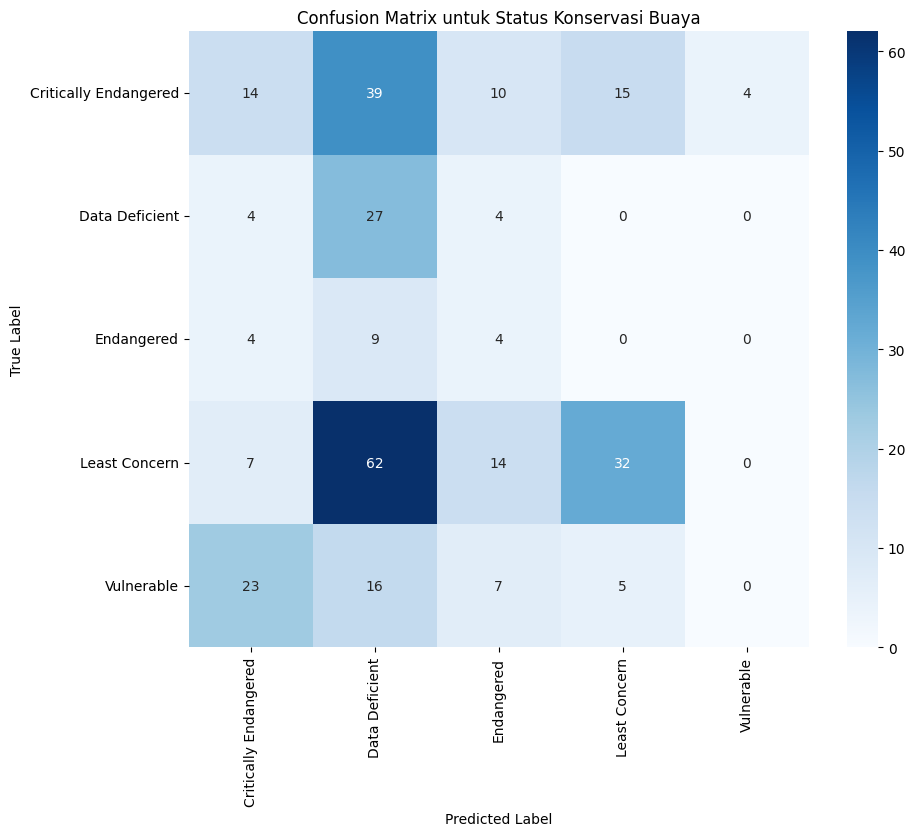

In [8]:
# 1. Impor Library yang Dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

print("Langkah 1: Library berhasil diimpor.")

# 2. Muat dan Persiapkan Data
try:
    df = pd.read_csv('crocodile_dataset.csv')
    print("Langkah 2: Dataset 'crocodile_dataset.csv' berhasil dimuat.")

    # Pilih fitur (X) dan target (y) yang akan digunakan
    features = ['Observed Length (m)', 'Observed Weight (kg)']
    target = 'Conservation Status'

    # Menghapus baris yang datanya kosong pada kolom fitur atau target
    # karena model tidak bisa dilatih dengan data kosong
    df_cleaned = df.dropna(subset=[target] + features).copy()
    print(f"Data dibersihkan, tersisa {len(df_cleaned)} dari {len(df)} baris.")

    X = df_cleaned[features]
    y = df_cleaned[target]

    # 3. Encoding Variabel Target (Mengubah teks 'Vulnerable', 'Least Concern', dll. menjadi angka)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    class_names = le.classes_ # Menyimpan nama asli kelas untuk label plot
    print("Langkah 3: Label target berhasil di-encode.")

    # 4. Membagi Data Menjadi Data Latih (Training) dan Data Uji (Testing)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.3,        # 30% data untuk testing
        random_state=42,      # Agar hasil pembagian data selalu sama
        stratify=y_encoded    # Menjaga proporsi setiap kelas di data train dan test
    )
    print("Langkah 4: Data berhasil dibagi menjadi data latih dan uji.")

    # 5. Latih Model Klasifikasi (Regresi Logistik)
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train, y_train)
    print("Langkah 5: Model berhasil dilatih.")

    # 6. Buat Prediksi Menggunakan Data Uji
    y_pred = model.predict(X_test)
    print("Langkah 6: Prediksi pada data uji selesai.")

    # 7. Hasilkan dan Visualisasikan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix untuk Status Konservasi Buaya')
    plt.savefig('confusion_matrix.png') # Menyimpan gambar

    print("\n--- HASIL ---")
    print("Gambar 'confusion_matrix.png' berhasil dibuat dan disimpan.")
    print("Anda bisa melihatnya di panel file di sebelah kiri Colab.")

    # Tampilkan juga laporan klasifikasi untuk detail performa
    print("\nLaporan Klasifikasi Model:")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

except FileNotFoundError:
    print("\nERROR: File 'crocodile_dataset.csv' tidak ditemukan.")
    print("Pastikan Anda sudah mengunggah file tersebut ke Google Colab.")


## 8. README Generator

Jalankan sel kode di bawah ini untuk membuat file `README.md` secara otomatis untuk proyek Anda. File ini akan menjadi halaman utama repositori GitHub Anda.

In [9]:
import os, textwrap
BASE = "/content/drive/MyDrive/trpl-ai-capstone"
readme = textwrap.dedent("""
# TRPL AI Capstone — Week 1

## Judul Proyek
Crocodile_Analyst

## Problem Statement
- **Masalah**: Lembaga konservasi internasional kekurangan analisis data terpusat untuk memahami hubungan antara karakteristik fisik buaya (panjang, berat), lokasi geografis, dan status keterancamannya. Pemahaman ini krusial untuk mengarahkan sumber daya konservasi secara efektif.
- **Pengguna**: Peneliti biologi, manajer program konservasi, dan pembuat kebijakan lingkungan.
- **Nilai**: Proyek ini akan menyediakan dasbor analisis dan model prediktif sederhana untuk mengidentifikasi faktor-faktor kunci yang berkorelasi dengan status "Critically Endangered", membantu prioritas alokasi dana dan upaya perlindungan di lapangan.

## Scope
- In-scope: - **In-Scope**:
    - Analisis statistik deskriptif dari `crocodile_dataset.csv`.
    - Visualisasi distribusi buaya berdasarkan negara dan status konservasi.
    - Membuat model machine learning *baseline* untuk memprediksi `Conservation Status` berdasarkan fitur fisik dan geografis.
    - Menganalisis korelasi antara panjang/berat dan status konservasi.
- Out-of-scope: **Out-of-Scope**:
    - Mengumpulkan data baru dari lapangan.
    - Membangun sistem *real-time* monitoring.
    - Analisis data genetik atau citra satelit.

## Metrik & Target
- **Metrik Utama**: **F1-Score** untuk kelas 'Critically Endangered'. Karena jumlah spesies yang terancam punah jauh lebih sedikit, F1-Score memberikan gambaran yang lebih baik daripada akurasi.
- **Target**: Mencapai F1-Score di atas **0.75** untuk kelas 'Critically Endangered'.
- **Baseline**: Model klasifikasi sederhana (seperti Regresi Logistik) yang dilatih pada data, yang mungkin memiliki F1-score awal sekitar **0.50 - 0.60**.


## Data
- **Sumber**: Kaggle.com , public data -> dataset name : crocodile_dataset.csv

## Arsitektur Ringkas
![diagram](docs/matrix.png)

## Roadmap (Mingguan)
- **M1**: Analisa Masalah
- **M2**: Pencarian Dataset
- **M3**: Pembuatan
- **M4**: Dokumentasi dan laporan akhir

## Etika & Privasi (Risiko & Mitigasi)
- **Risiko**: Data ini mengandung nama pengamat (`Observer Name`) dan lokasi geografis spesifik (`Country/Region`, `Habitat Type`). Penyalahgunaan data ini dapat membahayakan privasi individu dan memfasilitasi perburuan liar terhadap spesies yang terancam.
- **Mitigasi**: Kolom `Observer Name` akan di-hash atau dihapus dari dataset yang digunakan untuk analisis publik. Data lokasi akan diagregasi ke tingkat regional yang lebih luas saat memvisualisasikan atau membagikan hasil untuk melindungi populasi buaya dari ancaman eksternal.

### Kotak Submisi
- Tempel link GitHub dan Google Drive Anda di sini:
    - Link Repositori GitHub: https://github.com/JordanHtg/Buaya_Data_Analysis.git
    - Link Google Drive (jika ada): https://colab.research.google.com/drive/1WX-ZcpYR7qoTYUnZcSgFu-B-ej6rIJ9Y?usp=drive_link
""")
os.makedirs(BASE, exist_ok=True)
with open(os.path.join(BASE, "README.md"), "w") as f:
    f.write(readme)
print("README.md dibuat di:", os.path.join(BASE, "README.md"))

README.md dibuat di: /content/drive/MyDrive/trpl-ai-capstone/README.md


## 9. Tugas M1: Perancangan Proyek Analisis Buaya

Lengkapi kerangka proyek di bawah ini sebagai tugas akhir Minggu 1.

### 1. Masalah & Nilai Proyek
- **Masalah**: Lembaga konservasi internasional kekurangan analisis data terpusat untuk memahami hubungan antara karakteristik fisik buaya (panjang, berat), lokasi geografis, dan status keterancamannya. Pemahaman ini krusial untuk mengarahkan sumber daya konservasi secara efektif.
- **Pengguna**: Peneliti biologi, manajer program konservasi, dan pembuat kebijakan lingkungan.
- **Nilai**: Proyek ini akan menyediakan dasbor analisis dan model prediktif sederhana untuk mengidentifikasi faktor-faktor kunci yang berkorelasi dengan status "Critically Endangered", membantu prioritas alokasi dana dan upaya perlindungan di lapangan.

### 2. Lingkup Proyek (Scope)
- **In-Scope**:
    - Analisis statistik deskriptif dari `crocodile_dataset.csv`.
    - Visualisasi distribusi buaya berdasarkan negara dan status konservasi.
    - Membuat model machine learning *baseline* untuk memprediksi `Conservation Status` berdasarkan fitur fisik dan geografis.
    - Menganalisis korelasi antara panjang/berat dan status konservasi.
- **Out-of-Scope**:
    - Mengumpulkan data baru dari lapangan.
    - Membangun sistem *real-time* monitoring.
    - Analisis data genetik atau citra satelit.

### 3. Metrik Evaluasi Awal
- **Metrik Utama**: **F1-Score** untuk kelas 'Critically Endangered'. Karena jumlah spesies yang terancam punah jauh lebih sedikit, F1-Score memberikan gambaran yang lebih baik daripada akurasi.
- **Target**: Mencapai F1-Score di atas **0.75** untuk kelas 'Critically Endangered'.
- **Baseline**: Model klasifikasi sederhana (seperti Regresi Logistik) yang dilatih pada data, yang mungkin memiliki F1-score awal sekitar **0.50 - 0.60**.
- **Sumber**: Kaggle.com , public data -> dataset name : crocodile_dataset.csv

### 4. Roadmap Mingguan
- **M1**: Analisa Masalah
- **M2**: Pencarian Dataset
- **M3**: Pembuatan
-**M4**: Dokumentasi dan laporan akhir


- **Struktur Folder**:
    ```
    /
    ├── notebooks/
    │   └── eksplorasi_awal.ipynb
    ├── data/
    │   └── crocodile_dataset.csv
    └── README.md
    ```

### 5. Etika & Privasi
- **Risiko**: Data ini mengandung nama pengamat (`Observer Name`) dan lokasi geografis spesifik (`Country/Region`, `Habitat Type`). Penyalahgunaan data ini dapat membahayakan privasi individu dan memfasilitasi perburuan liar terhadap spesies yang terancam.
- **Mitigasi**: Kolom `Observer Name` akan di-hash atau dihapus dari dataset yang digunakan untuk analisis publik. Data lokasi akan diagregasi ke tingkat regional yang lebih luas saat memvisualisasikan atau membagikan hasil untuk melindungi populasi buaya dari ancaman eksternal.

### Kotak Submisi
- Tempel link GitHub dan Google Drive Anda di sini:
    - Link Repositori GitHub: https://github.com/JordanHtg/Buaya_Data_Analysis.git
    - Link Google Drive (jika ada): https://colab.research.google.com/drive/1WX-ZcpYR7qoTYUnZcSgFu-B-ej6rIJ9Y?usp=drive_link

---
Selesai ✅ — Jalankan **README Generator** dulu sebelum submit.
